# Part 1

In [3]:
import networkx as nx
import osmnx as ox
import pandas as pd
import os

ox.__version__

'2.0.0'

## Metrics table

### Generate graph files

In [11]:
# download/model a street network for some city then visualize it
capitals_comarca = [
    "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
    "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
    "el Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
    "Valls", "Balaguer", "Cervera", "Solsona", "la Seu d'Urgell", "Sort", "Tremp", 
    "el Pont de Suert", "Mollerussa", "les Borges Blanques", "Tàrrega", 
    "Olot", "Ripoll", "Puigcerdà", "Banyoles", "la Bisbal d'Empordà", "Santa Coloma de Farners",
    "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
    "Prats de Lluçanès", "Moià"
]


for capital in capitals_comarca:
#if capital is not saved, download it
    if not os.path.exists(f"Graphs/{capital}.graphml"):
        print(f"Creant graf de {capital}...")
        try:
            # Obtenir el graf de la ciutat
            G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
            
            # Guardar el graf en un fitxer
            ox.save_graphml(G, filepath=f"Graphs/{capital}.graphml")
            print(f"Graf de {capital} creat i guardat.")
        except Exception as e:
            print(f"No s'ha pogut crear el graf per a {capital}: {e}")

Creant graf de Barcelona...
Graf de Barcelona creat i guardat.
Creant graf de Girona...
Graf de Girona creat i guardat.
Creant graf de Lleida...
Graf de Lleida creat i guardat.
Creant graf de Tarragona...
Graf de Tarragona creat i guardat.
Creant graf de Mataró...
Graf de Mataró creat i guardat.
Creant graf de Sabadell...
Graf de Sabadell creat i guardat.
Creant graf de Terrassa...
Graf de Terrassa creat i guardat.
Creant graf de Manresa...
Graf de Manresa creat i guardat.
Creant graf de Vic...
Graf de Vic creat i guardat.
Creant graf de Igualada...
Graf de Igualada creat i guardat.
Creant graf de Vilafranca del Penedès...
Graf de Vilafranca del Penedès creat i guardat.
Creant graf de Vilanova i la Geltrú...
Graf de Vilanova i la Geltrú creat i guardat.
Creant graf de el Vendrell...
Graf de el Vendrell creat i guardat.
Creant graf de Reus...
Graf de Reus creat i guardat.
Creant graf de Tortosa...
Graf de Tortosa creat i guardat.
Creant graf de Amposta...
Graf de Amposta creat i guardat

### Generate metrics table

In [12]:
import math

data = []

H_max = math.log(36)  # ~3.584913
H_g   = 1.386  

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)

        # Add edge bearings
        ox.bearing.add_edge_bearings(G)

        G_proj = ox.projection.project_graph(G)
        # Show some basic stats about the network
        basic_stats = ox.stats.basic_stats(G_proj)

        # Calcular les mètriques
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_node_degree = sum(dict(G.degree()).values()) / num_nodes
        total_length = basic_stats["street_length_total"]
        avg_street_length = basic_stats["street_length_avg"]
        avg_betweenness_centrality_nodes = nx.betweenness_centrality(G_proj)
        avg_betweenness_centrality_nodes = sum(avg_betweenness_centrality_nodes.values()) / num_nodes
        avg_betweenness_centrality_edges = nx.edge_betweenness_centrality(G_proj)
        avg_betweenness_centrality_edges = sum(avg_betweenness_centrality_edges.values()) / num_edges
        orientation_entropy = ox.bearing.orientation_entropy(ox.convert.to_undirected(G))
        phi = 1.0 - ((orientation_entropy - H_g) / (H_max - H_g))**2
        dead_ends = basic_stats["streets_per_node_proportions"][1]
        k4_intersections = basic_stats["streets_per_node_proportions"][4]
        detour_index = basic_stats["circuity_avg"]

        # Afegir les mètriques a la taula
        data.append({
            "Capital": capital,
            "Number of Nodes": num_nodes,
            "Average Node Degree": avg_node_degree,
            "Total Length (m)": total_length,
            "Average Street Length (m)": avg_street_length,
            "Average Betweenness Centrality (Nodes)": avg_betweenness_centrality_nodes,
            "Average Betweenness Centrality (Edges)": avg_betweenness_centrality_edges,
            "Orientation Entropy": orientation_entropy,
            "Normalized Measure of Orientation-Order": phi,
            "Proportion of Dead-ends": dead_ends,
            "Proportion of k=4 Intersections": k4_intersections,
            "Detour Index": detour_index
        })

        print(f"Mètriques de {capital} calculades i afegides a la taula.")
    except Exception as e:
        print(f"No s'han pogut calcular les mètriques per a {capital}: {e}")

# Crear el DataFrame
df_data = pd.DataFrame(data)

Mètriques de Barcelona calculades i afegides a la taula.
Mètriques de Girona calculades i afegides a la taula.
Mètriques de Lleida calculades i afegides a la taula.
Mètriques de Tarragona calculades i afegides a la taula.
Mètriques de Mataró calculades i afegides a la taula.
Mètriques de Sabadell calculades i afegides a la taula.
Mètriques de Terrassa calculades i afegides a la taula.
Mètriques de Manresa calculades i afegides a la taula.
Mètriques de Vic calculades i afegides a la taula.
Mètriques de Igualada calculades i afegides a la taula.
Mètriques de Vilafranca del Penedès calculades i afegides a la taula.
Mètriques de Vilanova i la Geltrú calculades i afegides a la taula.
Mètriques de el Vendrell calculades i afegides a la taula.
Mètriques de Reus calculades i afegides a la taula.
Mètriques de Tortosa calculades i afegides a la taula.
Mètriques de Amposta calculades i afegides a la taula.
Mètriques de Gandesa calculades i afegides a la taula.
Mètriques de Falset calculades i afe

In [13]:
#write the datafreame to a csv file
df_data.to_csv("metrics.csv", index=False)

## Visualisation

### Betweenness centrality

#### Edges

In [15]:
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "BC", "Edges")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)
        G_proj = ox.projection.project_graph(G)
        # Edge betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')
        all_edges = list(G_proj.edges(keys=True)) 
        edge_betweenness_values = [edge_betweenness[(u, v, k)] for (u, v, k) in all_edges]

        # Normalize betweenness for linewidth scaling
        max_bet = max(edge_betweenness_values)
        min_bet = min(edge_betweenness_values)
        edge_widths = [1 + 4 * ((bet - min_bet) / (max_bet - min_bet)) for bet in edge_betweenness_values]

        # Plot the graph with varying edge widths
        fig, ax = ox.plot_graph(
            G_proj,
            edge_color='steelblue',
            edge_linewidth=edge_widths,
            node_size=0,  # Hide nodes for clarity
            bgcolor='white',
            show=False,
            close=False
        )

        # Build the file path for saving
        output_path = os.path.join(output_folder, f"{capital}_edge_betweenness.png")

        # Save the figure at high resolution
        fig.savefig(output_path, dpi=300, bbox_inches="tight")

        # Close the figure to free memory (especially important in a loop)
        plt.close(fig)

        print(f"Plot saved for {capital} at {output_path}")
        
    except Exception as e:
        print(f"The visualisation could not be created for {capital}: {e}")

Plot saved for Barcelona at Visualisations\BC\Edges\Barcelona_edge_betweenness.png
Plot saved for Girona at Visualisations\BC\Edges\Girona_edge_betweenness.png
Plot saved for Lleida at Visualisations\BC\Edges\Lleida_edge_betweenness.png
Plot saved for Tarragona at Visualisations\BC\Edges\Tarragona_edge_betweenness.png
Plot saved for Mataró at Visualisations\BC\Edges\Mataró_edge_betweenness.png
Plot saved for Sabadell at Visualisations\BC\Edges\Sabadell_edge_betweenness.png
Plot saved for Terrassa at Visualisations\BC\Edges\Terrassa_edge_betweenness.png
Plot saved for Manresa at Visualisations\BC\Edges\Manresa_edge_betweenness.png
Plot saved for Vic at Visualisations\BC\Edges\Vic_edge_betweenness.png
Plot saved for Igualada at Visualisations\BC\Edges\Igualada_edge_betweenness.png
Plot saved for Vilafranca del Penedès at Visualisations\BC\Edges\Vilafranca del Penedès_edge_betweenness.png
Plot saved for Vilanova i la Geltrú at Visualisations\BC\Edges\Vilanova i la Geltrú_edge_betweenness.

### Street angle orientation

#### Single polar histogram

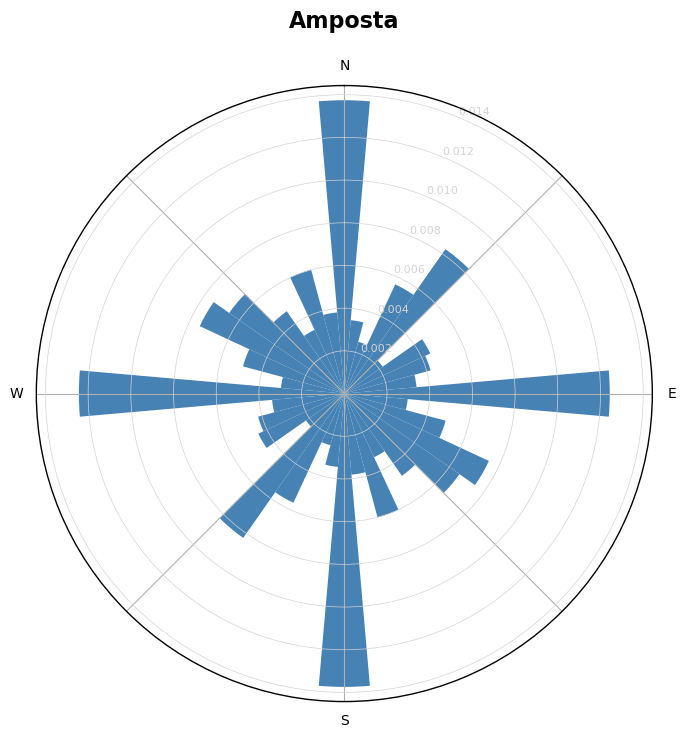

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms", "Increasing entropy")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)
        
        # Ensure graph is undirected
        if G.is_directed():
            G = ox.convert.to_undirected(G)
        
        # Add bearing attributes to each edge
        G = ox.bearing.add_edge_bearings(G)
        
        # Step 2: Extract and duplicate bearings for undirected streets
        all_bearings = []
        for u, v, key, data in G.edges(keys=True, data=True):
            if u == v or "bearing" not in data:
                continue
            bearing = data["bearing"]
            all_bearings.append(bearing)
            # Add reciprocal bearing for the opposite direction
            reverse_bearing = (bearing + 180) % 360
            all_bearings.append(reverse_bearing)
        
        bearings = np.array(all_bearings)
        
        # For this example, assume equal weight for each bearing
        weights = np.ones_like(bearings)
        
        # Step 3: Use split-and-merge approach to compute histogram bins
        num_bins = 36
        num_split_bins = num_bins * 2  # 72 bins for splitting
        # Create split bin edges from 0° to 360° (for 72 bins)
        split_bin_edges = np.linspace(0, 360, num_split_bins + 1)
        
        # Compute histogram on the split bins
        split_bin_counts, split_bin_edges = np.histogram(
            bearings,
            bins=split_bin_edges,
            weights=weights,
            density=True
        )
        
        # Roll the counts so near-boundary bearings are grouped together
        split_bin_counts = np.roll(split_bin_counts, 1)
        
        # Merge adjacent bins to form final 36 bins
        bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]
        
        # Compute bin centers: every other edge from the split bins
        bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
        
        # Convert bin centers to radians for polar plotting
        bin_centers_rad = np.radians(bin_centers)
        
        # Width of each bin in radians (10° width)
        bin_width_rad = np.radians(10)
        
        # Step 4: Plot the polar histogram
        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
        
        # Create bars for each bin
        bars = ax.bar(bin_centers_rad, bin_counts, width=bin_width_rad, bottom=0.0, alpha=1, color="steelblue")
        
        # Customize the polar plot
        ax.set_theta_zero_location("N")  # Set 0° at the top (North)
        ax.set_theta_direction(-1)       # Angles increase clockwise
        
        # Make radial lines at every 45°:
        angles = [0, 45, 90, 135, 180, 225, 270, 315]
        
        # Give labels for only the cardinal directions, leaving others blank:
        labels = ["N", "", "E", "", "S", "", "W", ""]
        
        ax.set_thetagrids(angles, labels=labels)
        ax.set_title("Amposta", y=1.08, fontsize=16, fontweight="bold")
        
        # ──────────────────────────────────────────────
        #    MAKE CIRCLES THINNER AND NUMBERS LIGHTER
        # ──────────────────────────────────────────────
        
        # 1) Make radial grid lines thinner and a light color
        for circle in ax.yaxis.get_gridlines():
            circle.set_linewidth(0.5)       
            circle.set_color("lightgray")  
        
        # 2) Make the radial tick labels light gray
        for label in ax.yaxis.get_ticklabels():
            label.set_color("lightgray")
            label.set_fontsize(8)
        
        # 3) Optionally do the same for the radial spine (outer circle):
        ax.spines["polar"].set_linewidth(1.0)       
        ax.spines["polar"].set_color("black")  

        # plt.show() or save as image     
        

    except Exception as e:
        print(f"The visualisation could not be created for {capital}: {e}")


#### Combined polar histogram ordered by increasing entropy

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

# 1. Sort df_data by increasing Orientation Entropy
df_data_sorted = df_data.sort_values(by="Orientation Entropy", ascending=True)

# 2. Decide how many subplots across (ncols) and down (nrows) you want
#    Since you have 44 cities, you can do, e.g., 6 rows x 8 columns = 48 subplots total
nrows, ncols = 6, 8
fig, axes = plt.subplots(nrows=nrows,
                         ncols=ncols,
                         subplot_kw={'projection': 'polar'},
                         figsize=(24, 18))  # Feel free to adjust size

# 3. Iterate through each city in ascending order of entropy
for i, row in enumerate(df_data_sorted.itertuples(index=False)):
    
    capital = row.Capital          # or however you store city names

    # Identify which "ax" (subplot) we should draw on
    ax = axes[i // ncols, i % ncols]
    
    try:
        # Load the graph
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)

        # Ensure graph is undirected
        if G.is_directed():
            G = ox.convert.to_undirected(G)

        # Add bearing attributes
        G = ox.bearing.add_edge_bearings(G)

        # Gather bearings (duplicating for undirected streets)
        all_bearings = []
        for u, v, key, data in G.edges(keys=True, data=True):
            if u == v or "bearing" not in data:
                continue
            bearing = data["bearing"]
            all_bearings.append(bearing)
            reverse_bearing = (bearing + 180) % 360
            all_bearings.append(reverse_bearing)

        bearings = np.array(all_bearings)
        weights = np.ones_like(bearings)  # Equal weight for each bearing

        # Split-and-merge approach
        num_bins = 36
        num_split_bins = num_bins * 2  # 72 bins
        split_bin_edges = np.linspace(0, 360, num_split_bins + 1)

        split_bin_counts, _ = np.histogram(
            bearings,
            bins=split_bin_edges,
            weights=weights,
            density=True
        )
        # Roll and merge
        split_bin_counts = np.roll(split_bin_counts, 1)
        bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]

        # Convert bin centers to radians
        bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
        bin_centers_rad = np.radians(bin_centers)
        bin_width_rad = np.radians(10)  # Each bin is 10°

        # Plot polar histogram in the current subplot
        bars = ax.bar(bin_centers_rad, bin_counts,
                      width=bin_width_rad, bottom=0.0,
                      alpha=1, color="steelblue")

        # Customize polar orientation
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)

        # Minor aesthetic settings
        angles = [0, 45, 90, 135, 180, 225, 270, 315]
        labels = ["N", "", "E", "", "S", "", "W", ""]
        ax.set_thetagrids(angles, labels=labels)
        
        # Give each subplot a title
        # Showing the city name + entropy, if desired
        ax.set_title(f"{capital}", y=1.15, fontsize=12, fontweight="bold")

        # Make circles thinner and numbers lighter
        for circle in ax.yaxis.get_gridlines():
            circle.set_linewidth(0.5)
            circle.set_color("lightgray")
        for label in ax.yaxis.get_ticklabels():
            label.set_color("lightgray")
            label.set_fontsize(8)
        ax.spines["polar"].set_linewidth(1.0)
        ax.spines["polar"].set_color("black")

    except Exception as e:
        # If something fails for a particular city, just print the error
        print(f"Visualization could not be created for {capital}: {e}")
        # Optionally turn off that subplot
        ax.axis("off")

# 4. Turn off any leftover subplots (if you have fewer than nrows*ncols)
total_plots = nrows * ncols
for j in range(len(df_data_sorted), total_plots):
    axes[j // ncols, j % ncols].axis("off")

plt.tight_layout()

# 5. Finally, save the entire figure to the output folder
output_path = os.path.join(output_folder, "polar_histograms_by_increasing_entropy.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print(f"Saved combined figure with all histograms to {output_path}")

Saved combined figure with all histograms to Visualisations\Polar histograms\polar_histograms_by_increasing_entropy.png


#### Street network + polar histogram for maximum and minimun entropy cities

In [112]:
# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

cities = ["Granollers", "Manresa"]

for city_name in cities:
    graph_file = f"Graphs/{city_name}.graphml"

    # Load and ensure undirected
    G = ox.load_graphml(graph_file)
    if G.is_directed():
        G = ox.convert.to_undirected(G)

    ###############################################################################
    # 1) Create a SINGLE main figure + main axes for the street network
    ###############################################################################
    fig, ax_main = plt.subplots(figsize=(10, 10))  # adjust as you like

    # Plot the street network on ax_main
    ox.plot_graph(
        G,
        ax=ax_main,
        show=False,
        close=False,
        node_size=0,        
        edge_color="darkgray",
        edge_linewidth=0.6
    )

    # Remove any title, ticks, or labels from the main axes
    ax_main.set_title("")  # no title
    ax_main.set_xticks([])
    ax_main.set_yticks([])

    ###############################################################################
    # 2) Add a smaller INSET axes for the polar histogram (bottom-right corner)
    ###############################################################################
    # The [left, bottom, width, height] coordinates range from 0 to 1
    # across the figure. Tweak them until the histogram is where you want it.
    # Decide inset placement before creating the axes

    if city_name == "Manresa":
        # bottom-left
        inset_bounds = [0.1, 0.1, 0.2, 0.2]  # [left, bottom, width, height]
    else:
        # bottom-right
        inset_bounds = [0.65, 0.1, 0.2, 0.2]
    
    inset_ax = fig.add_axes(inset_bounds, projection="polar")

    # Next, create the same polar histogram logic as before
    G = ox.bearing.add_edge_bearings(G)

    all_bearings = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if u == v or "bearing" not in data:
            continue
        bearing = data["bearing"]
        all_bearings.append(bearing)
        reverse_bearing = (bearing + 180) % 360
        all_bearings.append(reverse_bearing)

    bearings = np.array(all_bearings)
    weights = np.ones_like(bearings)

    num_bins = 36
    num_split_bins = num_bins * 2
    split_bin_edges = np.linspace(0, 360, num_split_bins + 1)
    split_bin_counts, _ = np.histogram(bearings, bins=split_bin_edges,
                                       weights=weights, density=True)
    # Roll, then merge adjacent bins
    split_bin_counts = np.roll(split_bin_counts, 1)
    bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]

    bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
    bin_centers_rad = np.radians(bin_centers)
    bin_width_rad = np.radians(10)

    bars = inset_ax.bar(
        bin_centers_rad, bin_counts, 
        width=bin_width_rad, bottom=0.0,
        alpha=1, color="steelblue"
    )

    # Customize orientation
    inset_ax.set_theta_zero_location("N")
    inset_ax.set_theta_direction(-1)

    # Show radial lines every 45°, label only N/E/S/W
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    labels = ["N", "", "E", "", "S", "", "W", ""]
    inset_ax.set_thetagrids(angles, labels=labels)

    # City name on top of the histogram
    inset_ax.set_title(city_name, y=1.15, fontsize=14, fontweight="bold")



    # Make circles thinner & radial labels lighter
    for circle in inset_ax.yaxis.get_gridlines():
        circle.set_linewidth(0.5)
        circle.set_color("lightgray")

    for label in inset_ax.yaxis.get_ticklabels():
        label.set_color("lightgray")
        label.set_fontsize(8)

    inset_ax.spines["polar"].set_linewidth(1.0)
    inset_ax.spines["polar"].set_color("black")

    ###############################################################################
    # 3) Save & Show
    ###############################################################################
    out_path = os.path.join(output_folder, city_name + "_street_network_+_polar_histogram.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)


## Correlations

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import os

# Define output folder path
output_folder = os.path.join("Correlations")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Read the data from the CSV file
df_data = pd.read_csv("Metrics/metrics.csv")

# 1) Drop the "Capital" column 
df_numeric = df_data.drop(columns="Capital")

# 2) Prepare empty DataFrames to store correlation and p-values
corr_vals = pd.DataFrame(np.zeros((df_numeric.shape[1], df_numeric.shape[1])),
                         columns=df_numeric.columns,
                         index=df_numeric.columns)
p_vals    = pd.DataFrame(np.zeros((df_numeric.shape[1], df_numeric.shape[1])),
                         columns=df_numeric.columns,
                         index=df_numeric.columns)

# 3) Loop through each pair of columns
for col1 in df_numeric.columns:
    for col2 in df_numeric.columns:
        if col1 == col2:
            # The correlation of a column with itself is 1, and p-value is 0 (by definition)
            corr_vals.loc[col1, col2] = 1.0
            p_vals.loc[col1, col2] = 0.0
        else:
            # Compute Pearson correlation and p-value
            r, p = pearsonr(df_numeric[col1], df_numeric[col2])
            corr_vals.loc[col1, col2] = r
            p_vals.loc[col1, col2] = p

# Save to a CSV file in the output_folder both correlation and p-values
corr_vals.to_csv(os.path.join(output_folder, "correlation_matrix.csv"))
p_vals.to_csv(os.path.join(output_folder, "p_values_matrix.csv"))

In [3]:
# Keep correlation values only if p < 0.05; set everything else to 0
corr_significant = corr_vals.where(p_vals < 0.05, np.nan)

# Keep p-values only if p < 0.05; set everything else to NaN
p_significant = p_vals.where(p_vals < 0.05, np.nan)

# Optionally save them to CSV if desired
corr_significant.to_csv(os.path.join(output_folder, "corr_significant.csv"))
p_significant.to_csv(os.path.join(output_folder, "p_significant.csv"))

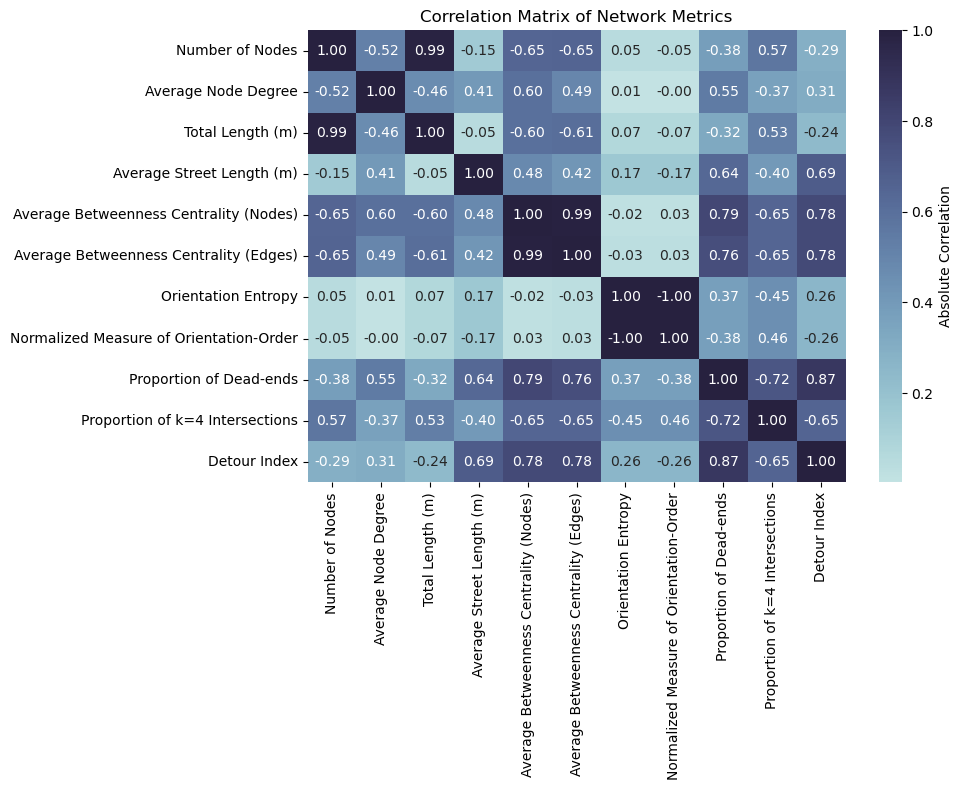

In [17]:
#plot a correlation matix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the correlation matrix
corr_vals = pd.read_csv("Correlations/correlation_matrix.csv", index_col=0)

# Compute the absolute correlation values for coloring
abs_corr_vals = corr_vals.abs()

# Create a custom colormap using the specified palette
custom_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
#use a sequential palette
sns.heatmap(abs_corr_vals, annot=corr_vals, fmt=".2f", cmap=custom_cmap,  cbar_kws={"label": "Absolute Correlation"})
plt.title("Correlation Matrix of Network Metrics")
plt.tight_layout()

# Save the plot
output_path = os.path.join("Visualisations/Correlations", "Correlation Matrix.png")
plt.savefig(output_path, dpi=300)

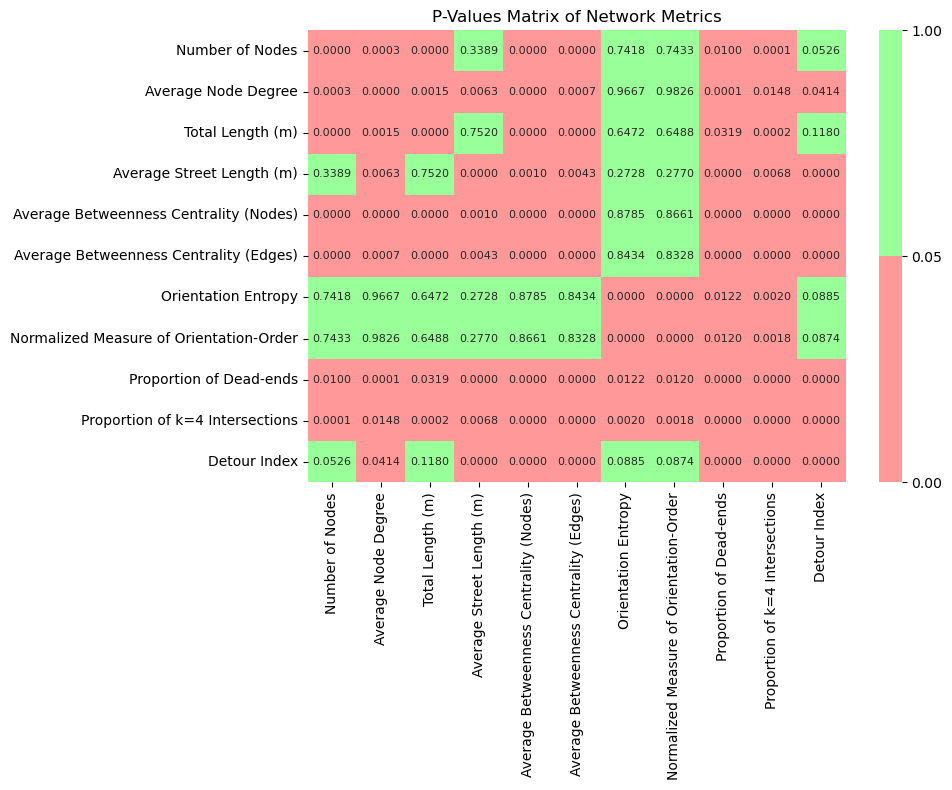

In [23]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load the Pearson p-values matrix
p_vals = pd.read_csv("Correlations/p_values_matrix.csv", index_col=0)

# Define two colors: one for p-values <= 0.05, one for p-values > 0.05
# Choose colors as needed; here we use "lightblue" for non-significant and "salmon" for significant
colors = ["#99ff99", "#ff9999"]

# Create a discrete colormap using the specified colors
cmap = ListedColormap(colors)

# Set boundaries for the two categories: [0, 0.05] and (0.05, 1]
norm = BoundaryNorm([0, 0.05, 1], ncolors=cmap.N, clip=True)

# Plot the p-values matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    p_vals, 
    annot=True, 
    fmt=".4f", 
    cmap=cmap, 
    norm=norm,
    annot_kws={"size": 8}
)
plt.title("P-Values Matrix of Network Metrics")
plt.tight_layout()

# Save the plot
output_path = os.path.join("Visualisations/Correlations", "P-Values Matrix.png")
plt.savefig(output_path, dpi=300)


## Province and vegueria aggregations

In [3]:
import pandas as pd


# Llista de capitals de comarca amb les seves províncies i vegueries
data = {
    "Capital": [
        "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
        "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
        "el Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
        "Valls", "Balaguer", "Cervera", "Solsona", "la Seu d'Urgell", "Sort", "Tremp", 
        "el Pont de Suert", "Mollerussa", "les Borges Blanques", "Tàrrega", 
        "Olot", "Ripoll", "Puigcerdà", "Banyoles", "la Bisbal d'Empordà", "Santa Coloma de Farners",
        "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
        "Prats de Lluçanès", "Moià"
    ],
     "Provincia": [
        "Barcelona", "Girona", "Lleida", "Tarragona", "Barcelona", "Barcelona", 
        "Barcelona", "Barcelona", "Barcelona", "Barcelona", "Barcelona", "Barcelona", 
        "Tarragona", "Tarragona", "Tarragona", "Tarragona", "Tarragona", "Tarragona", 
        "Tarragona", "Tarragona", "Lleida", "Lleida", "Lleida", "Lleida", "Lleida", 
        "Lleida", "Lleida", "Lleida", "Lleida", "Lleida", 
        "Girona", "Girona", "Girona", "Girona", "Girona", "Girona", 
        "Girona", "Lleida", "Barcelona", "Barcelona", "Barcelona", "Tarragona",
        "Barcelona", "Barcelona"
    ],
    "Vegueria": [
        "Barcelona", "Girona", "Lleida", "Camp de Tarragona", "Barcelona", "Barcelona", 
        "Barcelona", "Catalunya Central", "Catalunya Central", "Catalunya Central", "Penedès", "Penedès", 
        "Penedès", "Camp de Tarragona", "Terres de l'Ebre", "Terres de l'Ebre", "Terres de l'Ebre", "Camp de Tarragona", 
        "Camp de Tarragona", "Camp de Tarragona", "Lleida", "Lleida", "Catalunya Central", "Alt Pirineu i Aran", "Alt Pirineu i Aran", 
        "Alt Pirineu i Aran", "Alt Pirineu i Aran", "Lleida", "Lleida", "Lleida", 
        "Girona", "Girona", "Alt Pirineu i Aran", "Girona", "Girona", "Girona", 
        "Girona", "Alt Pirineu i Aran", "Catalunya Central", "Barcelona", "Barcelona", "Terres de l'Ebre",
        "Catalunya Central", "Catalunya Central"
    ]
}

# Crear DataFrame amb la informació de les províncies i les vegueries
df_info = pd.DataFrame(data)

In [4]:
# Llegir el fitxer metrics.csv
df_metrics = pd.read_csv('Metrics/metrics.csv')

# Unir les dades de metrics.csv amb la informació de les províncies i les vegueries
df = pd.merge(df_metrics, df_info, on="Capital")

Create the probability density function graphs

In [9]:
# Create a graph of the probability density function of the phi metric for the capitals of comarca separated by vegueria
import seaborn as sns
import matplotlib.pyplot as plt

# Create directories if they don't exist
os.makedirs("Visualisations/Distributions/vegueria", exist_ok=True)
os.makedirs("Visualisations/Distributions/province", exist_ok=True)

# For all measures create a graph of the probability density function of the phi metric for the capitals of comarca separated by vegueria and province
for measure in df.columns[2:12]:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, x=measure, hue="Vegueria", ax=ax)
    ax.set_title(f"Distribution of {measure} by Vegueria")
    # Save the plot
    plt.savefig(f"Visualisations/Distributions/vegueria/{measure}_by_vegueria.png")
    plt.close(fig)  # Close the figure to avoid displaying it

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, x=measure, hue="Provincia", ax=ax)
    ax.set_title(f"Distribution of {measure} by Province")
    # Save the plot
    plt.savefig(f"Visualisations/Distributions/province/{measure}_by_province.png")
    plt.close(fig)  # Close the figure to avoid displaying it


Calculate the mean values of each province and Vegueria so that the values can be displayed in a table

In [12]:
#calculate mean of the metrics by vegueria
df_vegureia=df.drop(columns=["Capital","Provincia"])
df_vegueria = df_vegureia.groupby("Vegueria",).mean().reset_index()

#save it in a csv
df_vegueria.to_csv("Agrupated_values/metrics_by_vegueria_mean.csv", index=False)

#calculate mean of the metrics by province
df_province=df.drop(columns=["Capital","Vegueria"])
df_province = df_province.groupby("Provincia",).mean().reset_index()

#save it in a csv
df_province.to_csv("Agrupated_values/metrics_by_province_mean.csv", index=False)

#calculate the median of the metrics by vegueria
df_vegureia=df.drop(columns=["Capital","Provincia"])
df_vegueria = df_vegureia.groupby("Vegueria",).median().reset_index()

#save it in a csv
df_vegueria.to_csv("Agrupated_values/metrics_by_vegueria_median.csv", index=False)

#calculate the median of the metrics by province
df_province=df.drop(columns=["Capital","Vegueria"])
df_province = df_province.groupby("Provincia",).median().reset_index()

#save it in a csv
df_province.to_csv("Agrupated_values/metrics_by_province_median.csv", index=False)

## Clustering

Create dendograms with different methods

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os

# Read the metrics.csv file
df_metrics = pd.read_csv('Metrics/metrics.csv')

# Select the columns to be used for clustering
columns_to_cluster = [
    "Number of Nodes", "Number of Edges", "Average Node Degree", "Total Length (m)", 
    "Average Edge Length (m)", "Betweenness Centrality (Nodes)", "Betweenness Centrality (Edges)", 
    "Orientation Entropy", "Proportion of Dead-ends", "Proportion of k=4 Intersections", "Detour Index"
]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics.drop(columns=("Capital")))

# Create directory if it doesn't exist
output_folder = "Visualisations/Clustering_all_vars"
os.makedirs(output_folder, exist_ok=True)

# Print and save the dendrograms
import scipy.cluster.hierarchy as sch

linkage_methods = ['ward', 'single', 'complete', 'average', 'centroid', 'weighted', 'median']
for method in linkage_methods:
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method), labels=df_metrics['Capital'].values)
    plt.title(f'Dendrogram with {method} linkage')
    plt.xlabel('Capitals')
    plt.ylabel('Euclidean distances')
    plt.savefig(os.path.join(output_folder, f'dendrogram_{method}.png'))
    plt.close()


Choose the number of clusters of the ward method

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Read the metrics.csv file
df_metrics = pd.read_csv('Metrics/metrics.csv')

# Select the columns to be used for clustering


# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics.drop(columns=("Capital")))

# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Elbow Method
wcss = []
k_range = range(1, 15)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(1, k+1)])
    wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)**2))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.savefig("Visualisations/Clustering_all_vars/Elbow_Method.png")
plt.close()

# Silhouette Method
silhouette_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Silhouette score is not defined for k=1

# Plot the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.savefig("Visualisations/Clustering_all_vars/Silhouette_Method.png")
plt.close()

# Davies-Bouldin Index
davies_bouldin_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(float('inf'))  # Davies-Bouldin score is not defined for k=1

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.savefig("Visualisations/Clustering_all_vars/Davies_Bouldin_Index.png")
plt.close()

S'HA DE REDACTAR MILLOR

Interpret elbow. The first point where there is a significant change of direction is 2 and 5

Silouhette suggests 4 (maximal point)

Davies Bouldin suggests 9 (minimal point)

In [17]:
# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Choose the number of clusters
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
df_metrics['Cluster'] = clusters

# Save the dataframe with cluster labels to a CSV file
df_metrics.to_csv('Clusters/ward_clusters_5_all_vars.csv', index=False)


c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


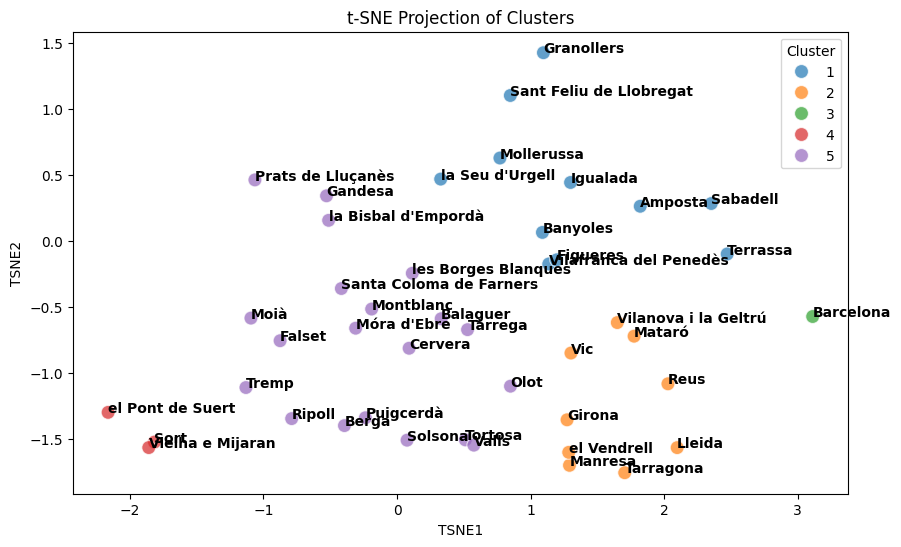

In [18]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the t-SNE components to the dataframe
df_metrics['TSNE1'] = X_tsne[:, 0]
df_metrics['TSNE2'] = X_tsne[:, 1]

# Plot the t-SNE projection with clusters and annotate some points
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_metrics, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=100, alpha=0.7)

# Annotate all points with city names
for i, point in df_metrics.iterrows():
    plt.text(point['TSNE1'], point['TSNE2'], point['Capital'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('t-SNE Projection of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.savefig('Visualisations/Clustering_all_vars/TSNE_all_vars.png')
plt.show()


### Clustering only with  average node degree, orientation indicator, median street segment length i average circuitry

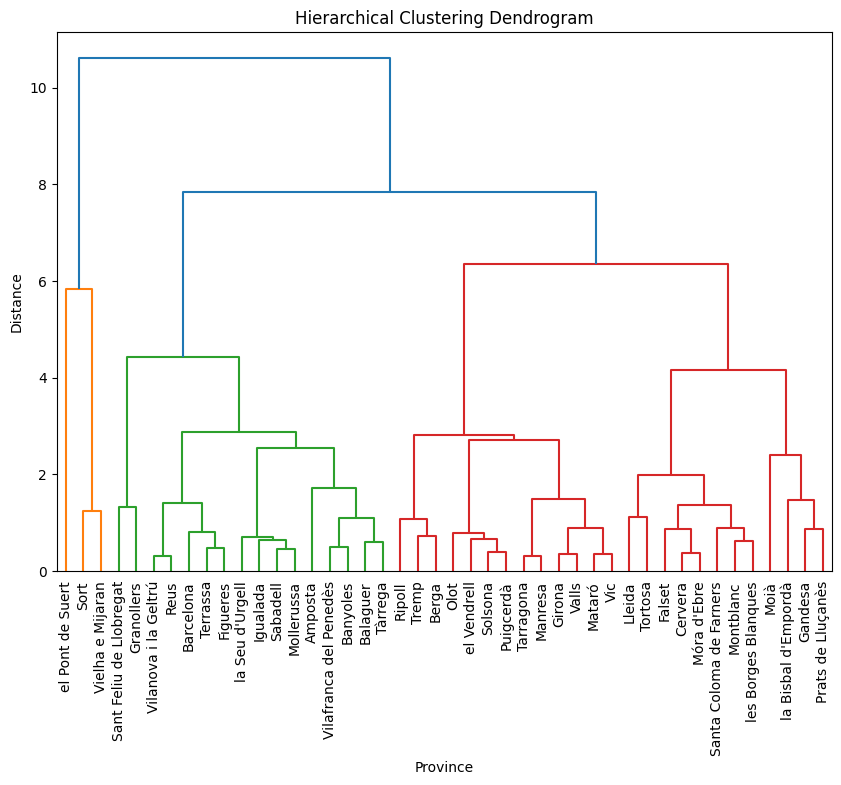

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd

df_metrics = pd.read_csv('Metrics/metrics.csv')

# Select the features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_metrics[["Average Node Degree", "Normalized Measure of Orientation-Order","Average Street Length (m)","Detour Index"]])

# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_metrics['Capital'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Province')
plt.ylabel('Distance')
plt.savefig('Visualisations/Clustering_selected_vars/Dendrogram.png')
plt.show()

# Choose the number of clusters
max_d = 150  # This is an example threshold, you can adjust it based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')


In [24]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Elbow Method
wcss = []
k_range = range(1, 15)
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(1, k+1)])
    wcss.append(sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)**2))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.savefig('Visualisations/Clustering_selected_vars/Elbow_Method.png')
plt.close()

# Silhouette Method
silhouette_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Silhouette score is not defined for k=1

# Plot the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.savefig('Visualisations/Clustering_selected_vars/Silhouette_Method.png')
plt.close()

# Davies-Bouldin Index
davies_bouldin_scores = []
for k in k_range:
    clusters = fcluster(Z, k, criterion='maxclust')
    if k > 1:
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(float('inf'))  # Davies-Bouldin score is not defined for k=1

# Plot the Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.savefig('Visualisations/Clustering_selected_vars/Davies_Bouldin_Index.png')
plt.close()

In [25]:
# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X, method='ward', metric='euclidean')

# Choose the number of clusters
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
df_metrics['Cluster'] = clusters

# Save the dataframe with cluster labels to a CSV file
df_metrics.to_csv('Clusters/ward_clusters_5_selected_vars.csv', index=False)


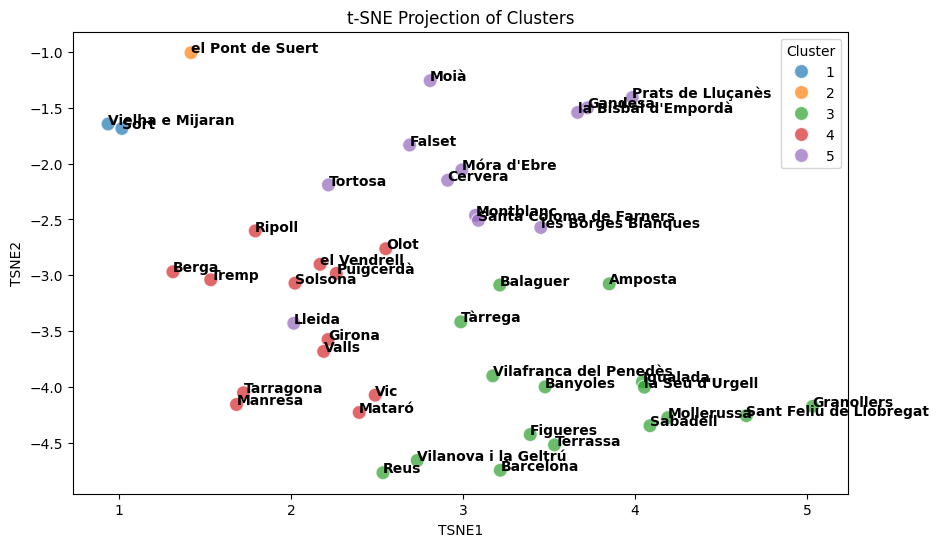

In [27]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE projection
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the t-SNE components to the dataframe
df_metrics['TSNE1'] = X_tsne[:, 0]
df_metrics['TSNE2'] = X_tsne[:, 1]

# Plot the t-SNE projection with clusters and annotate some points
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_metrics, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=100, alpha=0.7)

# Annotate all points with city names
for i, point in df_metrics.iterrows():
    plt.text(point['TSNE1'], point['TSNE2'], point['Capital'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('t-SNE Projection of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.savefig('Visualisations/Clustering_selected_vars/TSNE_selected_vars.png')

# PART 2

## Generate street segment lengths

In [13]:
capitals = ["Barcelona", "Girona", "Lleida", "Tarragona"]

output_folder = os.path.join("street segment length")
# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

for capital in capitals:
    # Load the graph
    graph_file = f"Graphs/{capital}.graphml"
    G = ox.load_graphml(graph_file)

    G = ox.convert.to_undirected(G)
    G_proj = ox.projection.project_graph(G)

    # Convert undirected graph to GeoDataFrame of edges
    edges_gdf = ox.convert.graph_to_gdfs(G_proj, nodes=False, edges=True)

    # Export just the lengths
    lengths = edges_gdf["length"]

    # Export to the output folder in a single-column CSV with header
    output_path = os.path.join(output_folder, f"{capital}_street_lengths.csv")
    lengths.to_csv(output_path, index=False, header=["Length (m)"])